This guides trains a neural network model to classify images of clothing, like sneakers and shirts.

In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


### Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of cloting at low resolution (28 by 28 pixels).
Here 60,0000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the _training_ set
* The model is tested against the test _set_, the `test_images` and `test_labels` arrays

The images are 28*28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 0. These correspond to the class of clothing the image represents

|Label|Class|
|------|-----|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot|

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

# Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

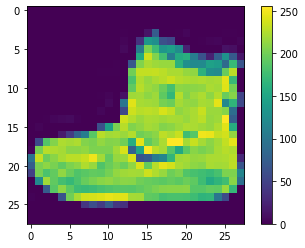

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image

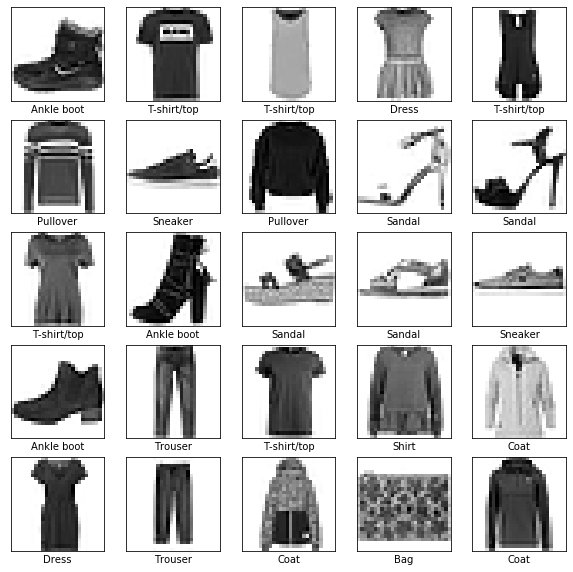

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model
## Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, it only reformats the data.
After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurones). The second (and last) layer returns a logits array with legth of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Complie the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
* __Loss function__: This measures how accurate the model is during the training. You want to minimize this function to "steer" the model in the right direction
* __Optimize__: This is ho the model is updated based on the data it sees and its loss function
* __Metrics__: Used to monitor the training and testing steps. The following example uses _accuracy_, the fraction of the images  that are correctly classified.

In [17]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:
1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays
2. The model learns to associate images and labels
3. You ask the model to make predictions about a tes set (in this example, the `test_images` array)
4. Verify that predictions match the labels from the `test_labels` array

### Feed the mdel
To start training, call the `model.fit` method

In [18]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4985 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3762 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3355 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3149 - accuracy: 0.8838
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2966 - accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2794 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2683 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2571 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2479 - accuracy: 0.9079
Epoch 10/10
60

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 ont the training data

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

10000/10000 - 0s - loss: 0.3402 - accuracy: 0.8807


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs that it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Make preditions
Once the model is trained, we can use it to make predictions about some images. We attach a sotmax layer to convert the logits to probabilities, whch are easier to interpret.

In [21]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [25]:
predictions[0]

array([4.7376286e-10, 4.1785884e-11, 1.0244653e-09, 4.7934031e-13,
       7.8960101e-09, 4.1338499e-04, 4.5091014e-07, 2.3938799e-03,
       1.2441374e-08, 9.9719232e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's confidence that the image corresponds to each of the 10 different classes pf clothing. We can identify which labe has the highest confidence value:

In [26]:
np.argmax(predictions[0])

9

So, the model is most confident that this image correspond to the class 9. In order to verify the the prediction, we can examine the real label in the test data set

In [27]:
test_labels[0]

9

Now, we can verify the different class prediction by plotting the articles with the predicted probabilities for corresponding to the differents classes

In [32]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
     

### Verify predictions
We can use the trained model to make predictions about some images.
Let's plot some images predictions and prediction array. Correct prediction laels are blue and incorrect prediction labels are red. The number gives the percentage of the predicted label.

<function matplotlib.pyplot.show(*args, **kw)>

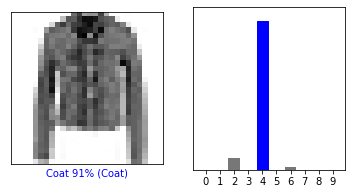

In [36]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show

Let's plot several images with their predictions. We notice that the model can be wrong even when very confident

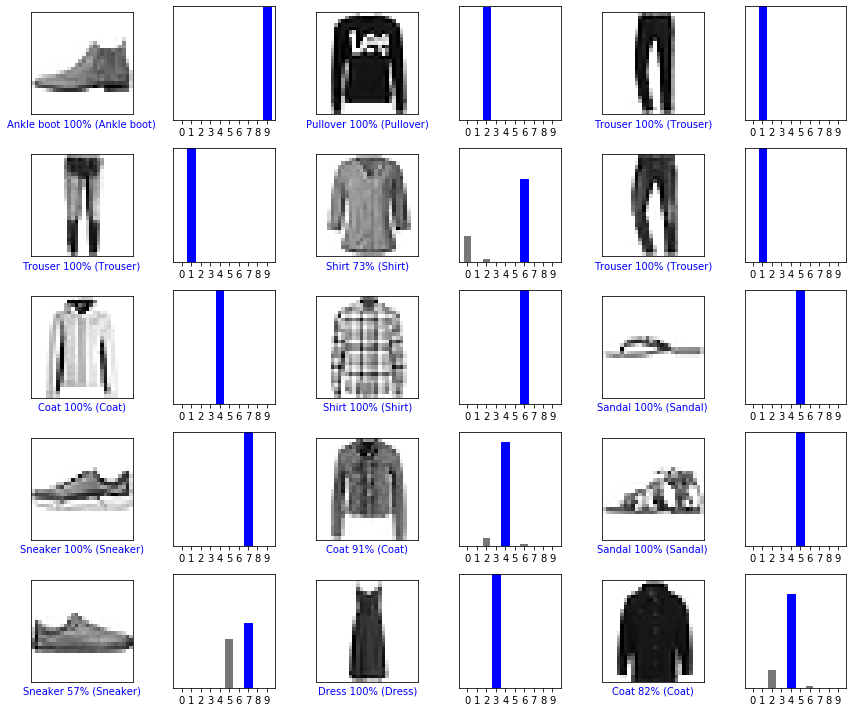

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Finally, we can use the trained model to make a prediction about a single image

In [39]:
# Take an image from the test dataset
img = test_images[1]

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you are using a single image you need to add it to a list

In [41]:
# Add the image to a batch where it is the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Now predict the correct label for this image

In [42]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[8.9977939e-06 5.5037474e-13 9.9878293e-01 2.8940199e-14 9.9826534e-04
  2.8661677e-11 2.0977325e-04 4.3083792e-17 1.6156602e-10 1.0528947e-15]]


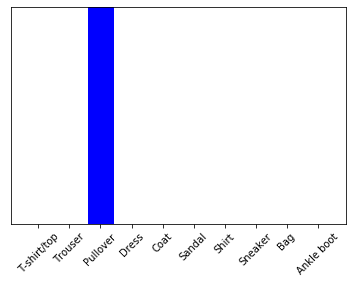

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists - one list for each image in the batch of data. Grab the predictions for our (only) image in the batch

In [44]:
np.argmax(predictions_single[0])

2